# Problema de valor en la frontera

## Introducción




En la unidad anterior nos enfocamos en ecuación diferenciales ordinarias condionadas por valores iniciales o **problema de valor inicial**.

Repasando la ecuación del péndulo:

**Ecuación gobernante**

\begin{equation*}
ml\frac{d^2}{dt^2}\Theta(t) + \kappa\frac{d}{dt}\Theta(t) + mg \sin \Theta(t) = 0
\end{equation*}

**Condiciones iniciales**
\begin{align*}
\dot{\Theta}(t = 0) &= 0 \\
\Theta(t = 0) &= \Theta_0
\end{align*}

Ahora, supontagamos que en el problema del péndulo conocemos el ángulo en $t = 0$, y en un tiempo $t = t_1$, tal que $\Theta(t_1) = \Theta_1$. 

En este caso, la EDO está condicionada por **condiciones de frontera**, en la forma


**Ecuación gobernante**

\begin{equation*}
ml\frac{d^2}{dt^2}\Theta(t) + \kappa\frac{d}{dt}\Theta(t) + mg \sin \Theta(t) = 0
\end{equation*}

**Condiciones de borde**
\begin{align*}
\Theta(t = 0) &= \Theta_0 \\
\Theta(t = t_1) &= \Theta_1
\end{align*}

Una condición de borde, así se define como el **condicionamiento de una solución en valores extremos**

Aunque en el ejemplo anterior consideramos la variable tiempo, los **problemas de condiciones de borde o valor de frontera, son normalmente aplicados para variables espaciales.**

Por ejemplo, consideremos el problema de una barra de largo $L$ y diámetro $d$, con temperatura constante en los extremos izquierdo y derecho $T_a$ y $T_b$, respectivamente, y expuesta a pérdidas de calor por convección y radiación.

<img src="./images/heated_bar.png" width="400px" align= center>

La ecuación que describe la distribución de temperaturas en el eje axial está definida por:

\begin{equation*}
\frac{d^2T}{dx^2} + h'(T_\infty - T) + \sigma'(T_\infty^4 - T^4) = 0
\end{equation*}

donde $h'$ y $\sigma'$ son coeficientes de transferencia de calor por convección y radiación, respectivamente.

y las condiciones de borde son:
\begin{align*}
T(0) &= T_a\\
T(L) &= T_b
\end{align*}

El modelo respresenta una **EDO no lineal con valor de frontera**.

En esta unidad revisaremos dos métodos para resolver este tipo de problemas:

- Método del disparo
- Método de diferencias finitas

## Método de disparo

El método del disparo consiste en transformar una EDO con condiciones de borde a una EDO de valor inicial. Mediante un proceso iterativo, el método busca una solución al problema de valores iniciales que satisfaga la condiciones de bordes.

Para ilustrar este método, consideremos el problema de la barra con enfriamiento.

Podemos transformar este problema en un problema de valor inicial de la forma:

\begin{align*}
\frac{dT}{dx} &= q \\
\frac{dq}{dx} &= - h'(T_\infty - T) - \sigma'(T_\infty^4 - T^4)
\end{align*}

Con condiciones iniciales:

\begin{align*}
T(0) &= T_a \\
\frac{dT}{dx}\Big|_{x=0} = q(0) &= q_a
\end{align*}

Si conocieramos el valor de $T_a$ y $q_a$, podríamos resolver el problema como una EDO con valor inicial. Sin embargo, el valor de $q_a$ es desconocido.

Por otro lado, sabemos que existirá un valor de $q_a$, tal que $T( L) = T_b$.

Ilustrativamente, esto es similar a ajustar el ángulo de inclinación de un cañón (o la pendiente a través de $z_a$), hasta que la trayectoria del disparo coincida con el valor la segunda condición de borde.

<img src="./images/shooting_method.png" width="400px" align= center>

El método del disparo, así, consiste en iterar sobre el valor de $q_a$, resolviendo el problema como una EDO de valor inicial, hasta que $T(L) = T_b$.

Analicemos esto con el problema de la barra en enfriamiento, y los valores:
 - $L = 10$ m
 - $h' = 0.05$ m$^{-2}$
 - $\sigma' =  2.7\times 10^{-9}$ K$^{-3}$ m$^{-2}$,  
 - $T_\infty = 200~\mathrm{K}$, 
 - $T_a = 300~\mathrm{K}$
 - $T_b = 400~\mathrm{K}$

Si escribimos la EDO con valor inicial de la forma $\vec{y} = \vec{F}(t,\vec{y})$, tenemos:

\begin{equation*}
\vec{y} = \Bigg\{\begin{matrix}
T \\
q
\end{matrix}\Bigg\};
\quad\quad
\vec{F} = \Bigg\{\begin{matrix}
q \\
- h'(T_\infty - T) - \sigma'(T_\infty^4 - T^4)
\end{matrix}\Bigg\};\quad\quad \vec{y}_0 = \Bigg\{\begin{matrix}
T_a \\
q_a
\end{matrix}\Bigg\}
\end{equation*}

donde $t = x$.

In [1]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

# Definimos las constantes
h   = 0.05   # coeficiente convectivo (m^-2)
S   = 2.7E-9 # coeficiente radiativo (K^-3 m^-2)
Too = 200    # Temperatura del exterior (K)
Ta  = 300    # Temperatura extremo izquierdo (K)
Tb  = 400    # Temperatura extremo derecho (K)
L   = 10     # Largo de la barra (m)

# Declaramos F con y[0] = T, y[1] = q
F = lambda t, y: [y[1], 
                 - h*(Too - y[0]) - S*(Too**4 - y[0]**4)]

Analicemos el comportamiento de este problema para $q_a = -40$ y $q_a = -45$. En la misma gráfica indicaremos el valor de $T(L) = T_b$

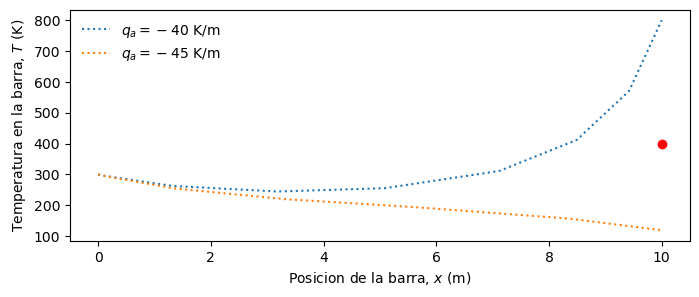

In [2]:
plt.rcParams.update({'font.size': 10}) # Tamaño de fuente
fig, ax = plt.subplots(figsize=(8,3))

plt.plot(L,Tb,'or')
# Resolvemos la ecuación para distintos valores de za
for qa in [-40, -45]:
    sol = solve_ivp(F, t_span = [0,L], y0 = [Ta, qa])
    ax.plot(sol.t,sol.y[0],':',label=r'$q_a = %.0f$ K/m' % qa)

ax.set_xlabel('Posicion de la barra, $x$ (m)')
ax.set_ylabel('Temperatura en la barra, $T$ (K)')
ax.legend(frameon=False)
plt.show()

¿Cómo podemos adivinar el valor de $q_a$ correcto?

Cláramente, el método gráfico nos ayuda a acercarnos a la solución. Por ejemplo, notamos ahora que el valor de $q_a$ está acotado entre $q_a\in[-40, -45]$ K/m. Asi, una alternativa sería utilizar interpolación lineal basado en estos dos primeras estimaciones.

Sin embargo, este método aún podría entregar resultados inexactos dado que la EDO es del tipo no-lineal.

Una forma más genérica de resolver este problema en un computador es utilizando métodos de búsqueda de raices.

Primero, debemos entender que resolver la EDO con valor inicial $T_a$ y $q_a$, y luego evaluarla en $x = L$, es equivalente a tener una función $T_{x=L}(q_a)$.

Así, el objetivo es encontrar la raíz de la función $f(q_a) = T_{x=L}(q_a) - T_b$

Implementemos esta solución mediante con el ejemplo anterior.

In [3]:
from scipy.optimize import root_scalar

# Declaramos la función objetivo para encontrar T(x = L) - Tb, dado "za"
def fobjective(qa):
    sol = solve_ivp(F,t_span = [0,L], y0 = [Ta, qa]) # solución de la odo con VI
    T = sol.y[0]                                     # distribución de temperaturas en la barra
    return T[-1] - Tb                                # retornamos T(x = L) - Tb

# Buscamos la raiz de fobjective(za)
qa_sol = root_scalar(fobjective, bracket = [-40, -45]).root
print('El valor de qa es: %.3f K/m' % qa_sol)

El valor de qa es: -41.735 K/m


De lo anterior, hemos determinado que el valor correcto para $q_a = -41.735~\mathrm{K/m}$. Ahora grafiquemos la solución correcta

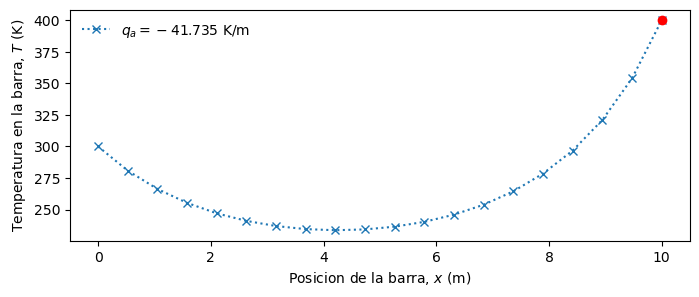

In [4]:
plt.rcParams.update({'font.size': 10}) # Tamaño de fuente
fig, ax = plt.subplots(figsize=(8,3))

x_range = np.linspace(0,L,20)  # rango de valores para evaluar T(x)

sol = solve_ivp(F,t_span = [0,L], t_eval = x_range, y0 = [Ta, qa_sol])
ax.plot(sol.t,sol.y[0],':x',label=r'$q_a = %.3f$ K/m' % qa_sol)
plt.plot(L,Tb,'or')

ax.set_xlabel('Posicion de la barra, $x$ (m)')
ax.set_ylabel('Temperatura en la barra, $T$ (K)')
ax.legend(frameon=False)
plt.show()

### Condiciones de borde de Neumann o Robin

Las condiciones de borde $T(0) = T_a$ y $T(L) = T_b$, se conoce como *condición de borde de Dirichlet o de primer tipo.* Es una de muchos tipos de condiciones de borde que se utilizan en ingeniería y ciencias.

A veces, las condiciones de borde están definidas en función de derivadas. En este caso distinguimos:



\begin{eqnarray*}
y'(a) &=& \alpha&&\quad\mathrm{condición~de~Neumann~(o~de~segundo~tipo)} \\
\alpha y(a) + \beta y'(a) &=& \gamma &&\quad\mathrm{condición~de~Robin~(o~de~tercer~tipo)}
\end{eqnarray*}

Lo común en ambos casos es la presencia de la derivada en la condición de borde.

Por ejemplo, respecto al problema de la barra, tenemos que si el extremo derecho pierde calor hacia el ambiente la condición es (condición de borde de Robin):

\begin{equation*}
\frac{dT}{dx}\Big|_{x=L} = h^*\left[ T_\infty - T(L)\right]
\end{equation*}

<img src="./images/heated_bar_convective_end.png" width="500px" align= center>

En este caso el procedimiento para resolver la EDO es similar, pero debemos modificar nuestra función objetivo.

Revisemos esto en un código para $h^* = 0.005$ m$^{-1}$

In [5]:
hstar = 0.005

# Declaramos la función objetivo, f(za) con condición de Neumann
def fobjective(qa):
    sol = solve_ivp(F,t_span = [0,L], y0 = [Ta, qa])
    T    = sol.y[0]                       # distribución de temperaturas en la barra
    dTdx = sol.y[1]                       # distribución de dTdx en la barra
    return dTdx[-1] - hstar*(Too - T[-1]) # retornamos dTdx|(x=L) - h(Too - T(L))

# Buscamos la raiz de f(za) - Tb
qa_sol = root_scalar(fobjective, bracket = [-40, -45]).root
print('El valor de za es: %.3f K/m' % qa_sol)


El valor de za es: -43.720 K/m


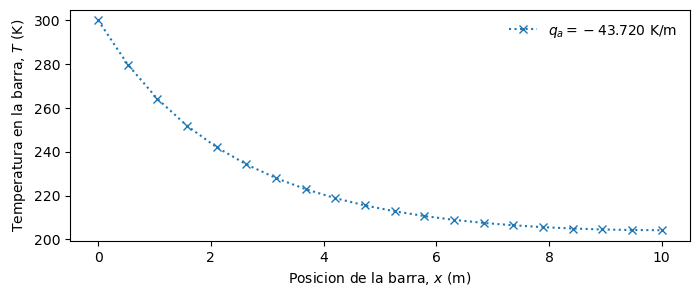

In [6]:
plt.rcParams.update({'font.size': 10}) # Tamaño de fuente
fig, ax = plt.subplots(figsize=(8,3))

x_range = np.linspace(0,L,20)  # rango de valores para evaluar T(x)

sol = solve_ivp(F,t_span = [0,L], t_eval = x_range, y0 = [Ta, qa_sol])
ax.plot(sol.t,sol.y[0],':x',label=r'$q_a = %.3f$ K/m' % qa_sol)

ax.set_xlabel('Posicion de la barra, $x$ (m)')
ax.set_ylabel('Temperatura en la barra, $T$ (K)')
ax.legend(frameon=False)
plt.show()

## Método de diferencias finitas

Diferencias finitas es el método más general para resolver EDOs con condiciones de borde. Esto consiste en discretizar la ecuación diferencial utilizando las fórmulas de la [unidad 8](../08-Derivacion_numerica/08-Derivacion_numerica.ipynb).

### EDO lineal con condición de borde de Dirichlet

Revisemos esto con el problema de la barra. Ahora, únicamente, considerando pérdidas de calor por convección.

<img src="./images/heated_bar_convection_losses.png" width="400px" align= center>

En este caso **la EDO es del tipo lineal**:

\begin{equation*}
\frac{d^2T}{dx^2} + h'(T_\infty - T) = 0
\end{equation*}

\begin{align*}
T(0) &= T_a\\
T(L) &= T_b
\end{align*}

El primer paso consiste en discretizar el dominio en una série de nodos.

<img src="./images/discretized_bar.png" width="500px" align= center>

Luego, aplicamos una fórmula de diferencias finitas en cada nodo. Por ejemplo, usando diferencia central tenemos:

\begin{equation*}
\frac{T_{i - 1}- 2T_i +T_{i + 1}}{\Delta x^2} + h'(T_\infty - T_i) = 0
\end{equation*}

Reordenando los términos tenemos:

\begin{equation*}
- T_{i - 1}+ (2 + h'\Delta x^2)T_i  - T_{i + 1} =  h'\Delta x^2 T_\infty
\end{equation*}

Podemos desarrollar esta expresión para cada nodo interior ($i = 1,\cdots, n-1$). Los valores de los nodos extremos están dados por las condiciones de borde $T_0 = T_a$, $T_n = T_b$.

El resultado nos entrega un sistema de ecuaciones lineales $Ax = b$, de la forma:

\begin{equation*}
\begin{bmatrix}
(2 + h'\Delta x^2) & -1 & & & \\
-1 & (2 + h'\Delta x^2) & -1 & &  \\
 & \ddots & \ddots & \ddots & \\
 & & -1& (2 + h'\Delta x^2)& -1 \\
 & & -1 & & (2 + h'\Delta x^2)
\end{bmatrix}\left[\begin{array}{c} T_1 \\T_2 \\ \vdots \\ T_{n-2} \\ T_{n-1} \end{array}\right] =
\left[\begin{array}{c} T_0 + h'\Delta x^2 T_\infty \\h'\Delta x^2 T_\infty \\ \vdots \\h'\Delta x^2 T_\infty \\ T_n + h'\Delta x^2 T_\infty\end{array}\right]
\end{equation*}

Notar que **la matriz $A$ es, naturalmente trididiagonal y diagnal dominante**. Este característica estará siempre presente en el método de diferencias finitas.

Como vimos en la [unidad 2](../02-Algebra_lineal/02-Algebra_lineal.ipynb) del curso, este tipo de sistemas de ecuaciones se pueden resolver mediante métodos iterativos (como Gauss-Seidel), los cuales destacan por su menor uso de recursos de memoria computacional.

Revisemos esto en un código en python. En este caso, queremos preparar un código genérico para un $n$ variable

Podemos expresar el sistema de ecuaciones, convenientemente, en la forma:

\begin{equation*}
\begin{bmatrix}
 1 &                  0 &                  0 &            \cdots &                    & \\ 
-1 & (2 + h'\Delta x^2) &                 -1 &                   &                    & \\
   & \ddots             & \ddots             &            \ddots &                    &\\
   &                    &                    &                -1 & (2 + h'\Delta x^2) & -1 \\
   &                    &             \cdots &                 0 &             0      & 1
\end{bmatrix}\left[\begin{array}{c} T_0 \\ T_1 \\ \vdots \\ T_{n-1} \\T_n \end{array}\right] =
\left[\begin{array}{c} T_a \\ h'\Delta x^2 T_\infty \\ \vdots \\ h'\Delta x^2 T_\infty \\ T_b\end{array}\right]
\end{equation*}

Esta formulación nos permitirá una expresión generalizada para crear nuestras matrices $A$ y $b$, que podemos modificar fácilmente ante un cambio en las condiciones de borde.

El siguiente código genera las matrices $A$ y $b$ para un número de nodos $n$ arbitrário.

In [7]:
# Código genérico para barra 1D con diferencias finitas
N  = 10              # número de nodos
dx = L/(N - 1)       # espaciamiento entre nodos
n  = N - 1           # nodo final   

A = np.zeros((N,N))  # declaramos matrix A
b = np.zeros(N)      # declaramos vector b

# recorremos los nodos de la barra
for i in range(N):
    # condiciones de borde
    #------------------------------------------------------
    if i == 0:       # T(x = 0) = Ta
        A[i,i] = 1
        b[i]   = Ta
        continue
    
    if i == n:       # T(x = L) = Tb
        A[i,i] = 1
        b[i]   = Tb
        continue
    
    # nodos interiores
    #------------------------------------------------------
    A[i,i-1], A[i,i], A[i,i+1] = -1, 2 + h*dx**2, -1
    b[i] = h*dx**2*Too

Resolvemos el sistema usando `numpy.linalg.solve`

In [8]:
T = np.linalg.solve(A,b) # Resolvemos el sistema

Luego graficamos nuestra solución

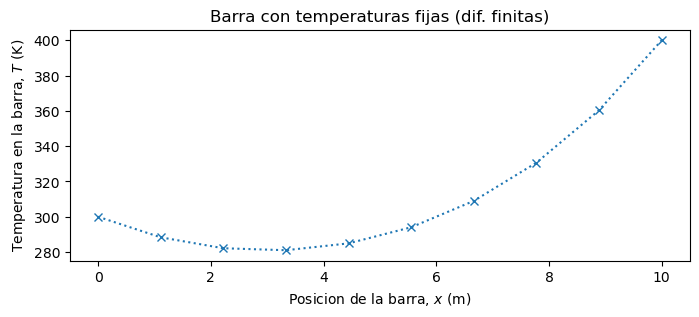

In [9]:
x = np.linspace(0,L,N)   # Discretización del dominio "x"

plt.rcParams.update({'font.size': 10}) # Tamaño de fuente
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(x,T,':x')

ax.set_title('Barra con temperaturas fijas (dif. finitas)')
ax.set_xlabel('Posicion de la barra, $x$ (m)')
ax.set_ylabel('Temperatura en la barra, $T$ (K)')
plt.show()

### EDO lineal con condición de borde de Robin

Consideremos ahora el caso de una barra con condiciones de borde de Robin:

\begin{equation*}
\frac{dT}{dx}\Big|_{x=L} = h^*\left[ T_\infty - T(L)\right]
\end{equation*}

<img src="./images/heated_bar_convection_losses_convective_end.png" width="500px" align= center>

Podemos aplicar diferencias hacia atrás en la condición de borde:

\begin{equation*}
\frac{T_{n}- T_{n - 1}}{\Delta x} = h'(T_\infty - T_n)
\end{equation*}

A partir de esto tenemos una nueva ecuación de la forma:

\begin{equation*}
- T_{n-1} + (1 + h'\Delta x)T_{n} = h'\Delta xT_\infty
\end{equation*}

El sistema de ecuaciones es similar al caso anterior, aunque con la nueva condición de borde en el nodo del extremo derecho:

\begin{equation*}
\begin{bmatrix}
 1 &                  0 &                  0 &            \cdots &                    & \\ 
-1 & (2 + h'\Delta x^2) &                 -1 &                   &                    & \\
   & \ddots             & \ddots             &            \ddots &                    &\\
   &                    &                    &                -1 & (2 + h'\Delta x^2) & -1 \\
   &                    &             \cdots &                 0 &              -1    & 1 + h'\Delta x
\end{bmatrix}\left[\begin{array}{c} T_0 \\ T_1 \\ \vdots \\ T_{n-1} \\T_n \end{array}\right] =
\left[\begin{array}{c} T_a \\ h'\Delta x^2 T_\infty \\ \vdots \\ h'\Delta x^2 T_\infty \\ h'\Delta x T_\infty\end{array}\right]
\end{equation*}

Respecto al código anterior, editamos la condición de borde para $i = n$

In [10]:
# Código genérico para barra 1D con diferencias finitas
N  = 10              # número de nodos
dx = L/(N - 1)       # espaciamiento entre nodos
n  = N - 1           # nodo final   

A = np.zeros((N,N))  # declaramos matrix A
b = np.zeros(N)      # declaramos vector b

# recorremos los nodos de la barra
for i in range(N):
    # condiciones de borde
    #------------------------------------------------------
    if i == 0:       # Condición de borde en el extremo izquierdo
        A[i,i] = 1
        b[i]   = Ta
        continue
    
    if i == n:       # Condición de borde en el extremo derecho
        A[i,i-1], A[i,i] = -1, 1 + h*dx
        b[i]     = h*dx*Too
        continue
    
    # nodos interiores
    #------------------------------------------------------
    A[i,i-1], A[i,i], A[i,i+1] = -1, 2 + h*dx**2, -1
    b[i] = h*dx**2*Too

Resolvemos el sistema:

In [11]:
T = np.linalg.solve(A,b) # Resolvemos el sistema

Finalmente, graficamos nuestra solución

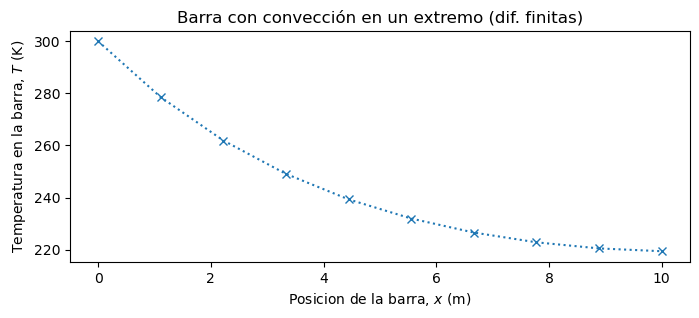

In [12]:
x = np.linspace(0,L,N)   # Discretización del dominio "x"

plt.rcParams.update({'font.size': 10}) # Tamaño de fuente
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(x,T,':x')

ax.set_title('Barra con convección en un extremo (dif. finitas)')
ax.set_xlabel('Posicion de la barra, $x$ (m)')
ax.set_ylabel('Temperatura en la barra, $T$ (K)')
plt.show()

### EDO no lineal

Si la EDO es no lineal la forma de resolver el problema es análoga. Sin embargo, **el sistema de ecuaciones a resolver también será del tipo no lineal y para esto debemos utilizar un método de búsqueda de raices**.

Revisemos esto con el problema de la barra con enfriamiento por radiación y convección

<img src="./images/heated_bar_convective_end.png" width="500px" align= center>

La ecuación discretizada por diferencias finitas es de la forma:

\begin{equation*}
\frac{T_{i - 1}- 2T_i +T_{i + 1}}{\Delta x^2} + h'(T_\infty - T_i) + \sigma'(T_\infty^4 - T_i^4) = 0
\end{equation*}

Reordenando los términos tenemos:

\begin{equation*}
- T_{i - 1}+ (2 + h'\Delta x^2)T_i + \sigma'\Delta x^2 T_i^4 - T_{i + 1} - h'\Delta x^2 T_\infty - \sigma' \Delta x^2 T_\infty^4 = 0
\end{equation*}

En el siguiente código implementamos las ecuaciones gobernantes mediante una función objetivo `fsystem`

In [13]:
# Código genérico para barra 1D con diferencias finitas
N  = 10              # número de nodos
dx = L/(N - 1)       # espaciamiento entre nodos
n  = N - 1           # nodo final   

def fsystem(T):
    
    f = np.zeros(N)
    for i in range(N):
    
        # condiciones de borde
        if i == 0:     # Temperatura fija en el extremo izquierdo
            f[0] = T[0] - Ta
            continue
        if i == n:     # convección en el extremo derecho
            f[n] = - T[n-1] + (1 + h*dx)*T[n] - h*dx*Too
            continue
    
        # nodos interiores
        f[i] = - T[i-1] + (2 + h*dx**2)*T[i] + S*dx**2*T[i]**4 - T[i+1] - h*dx**2*Too - S*dx**2*Too**4
        
    return f

Resolvemos el sistema usando `scipy.optimize.fsolve`

In [14]:
from scipy.optimize import fsolve

# condicionamos la variable inicial para la iteración
Tinc = np.ones(N)*Too # Too, Too, Too, Too,... Too

# Solución del sistema no lineal
T = fsolve(fsystem, x0 = Tinc)

Graficamos nuestra solución

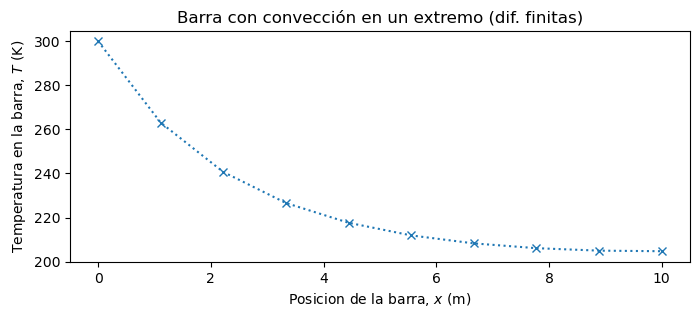

In [15]:
x = np.linspace(0,10,N)         # Discretización del dominio "x"

plt.rcParams.update({'font.size': 10}) # Tamaño de fuente
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(x,T,':x')

ax.set_title('Barra con convección en un extremo (dif. finitas)')
ax.set_xlabel('Posicion de la barra, $x$ (m)')
ax.set_ylabel('Temperatura en la barra, $T$ (K)')
plt.show()

## Método de colocación

El método de colocación consiste en **aproximar la función buscada por un polinómio de interpolación evaluado en puntos de colocación**. Aunque existen distintas versiones dependiendo del polinomio escogido, acá revisaremos los aspectos más generales del método.

Consideremos el problema general:

\begin{equation*}
\frac{dy}{dx} = F(x,y),
\end{equation*}

con condiciones de borde

\begin{align*}
\alpha_0 y(a) + \beta_0 y'(a) &= \gamma_0 \\
\alpha_n y(b) + \beta_n y'(b) &= \gamma_n
\end{align*}

donde $\alpha_0$, $\alpha_1$, $\beta_0$, $\beta_1$, $\gamma_0$ y $\gamma_1$ son constantes arbitrarias.

Para un set de $n + 1$ puntos de colocación $x_i = x_0, x_1,\dots,x_n$ aproximaremos $y$ por el polomio:

\begin{equation*}
S(x) = a_0 + a_1x + a_2x^2+ \cdots + a_n x^n
\end{equation*}

donde sus coeficientes están dados por la solución de $S(x_i) = y_i$. En forma matricial:

\begin{equation}
\left[\begin{matrix} 
1      &    x_0 &  x_0^2 & \cdots & x_0^n \\
1      &    x_1 &  x_1^2 & \cdots & x_1^n \\
\vdots & \vdots & \vdots & & \vdots \\
1      &    x_n &  x_n^2 & \cdots & x_n^n
\end{matrix}\right]
\left\{\begin{matrix}
a_0 \\ a_1 \\ a_2 \\ \vdots\\a_n
\end{matrix}\right\}
=
\left\{\begin{matrix}
y_0 \\ y_1 \\ y_2 \\ \vdots\\y_n
\end{matrix}\right\}
\end{equation}



por simplicidad, denotaremos el sistema como $A\omega = u$, donde $\omega$ y $u$ son vectores columna con los coeficientes $a_i$ y $y_i$ respectivamente; y $A$ es una matriz.

Por otro lado, el polinomio $S(x)$ debe ser solución de la ecuación diferencial en los puntos de colocación, es decir:

\begin{equation*}
\frac{dS}{dx}\Bigg|_{x = x_i} = F(x_i,S_i)\Rightarrow
\left[\begin{matrix} 
0      &    1 &  2x_0 & \cdots & nx_0^{n-1} \\
0      &    1 &  2x_1 & \cdots & nx_1^{n-1} \\
\vdots & \vdots & \vdots & & \vdots \\
0      &    1 &  2x_n & \cdots & nx_n^{n-1}
\end{matrix}\right]
\left\{\begin{matrix}
a_0 \\ a_1 \\ a_2 \\ \vdots\\a_n
\end{matrix}\right\}
=
\left\{\begin{matrix}
F(x_0,y_0) \\ F(x_1,y_1) \\ F(x_2,y_2) \\ \vdots\\ F(x_n,y_n)
\end{matrix}\right\}
\end{equation*}


Si reemplazamos la primera y última fila del sistema por las condiciones de borde, tenemos:

\begin{equation*}
\left[\begin{matrix} 
\alpha_0      &    \alpha_0x_0 +  \beta_0 &  \alpha_0x_0^2 + 2\beta_0x_0 & \cdots & \alpha_0x_0^n + n\beta_0x_0^{n-1} \\
0      &    1 &  2x_1 & \cdots & nx_1^{n-1} \\
\vdots & \vdots & \vdots & & \vdots \\
0      &    1 &  2x_{n-1} & \cdots & n(x_{n-1})^{n-1} \\
\alpha_n      &    \alpha_nx_n +  \beta_n &  \alpha_nx_n^2 + 2\beta_nx_n & \cdots & \alpha_0x_n^n + n\beta_0x_n^{n-1}
\end{matrix}\right]
\left\{\begin{matrix}
a_0 \\ a_1 \\ a_2 \\ \vdots\\ a_{n-1} \\ a_{n}
\end{matrix}\right\}
=
\left\{\begin{matrix}
\gamma_0 \\ F(x_1,y_1) \\ F(x_2,y_2) \\ \vdots\\ F(x_{n-1},y_{n-1}) \\ \gamma_n
\end{matrix}\right\}
\end{equation*}

para simplificar, denotaremos este sistema como $T\omega = b$.

Este sistema de ecuaciones tiene dos series de valores desconocidos, $a_i$ y $y_i$. Sin embargo, a partir del sistema de ecuaciones (10.1), tenemos que $\omega = A^{-1}u$

Combinando ambos resultados, tenemos que los valores de $y_i$ en los puntos de colocación están dados por la solución de $TA^{-1}u = b$:

explícitamente:

<div class="full-width">
<p style="line-height:2.0em;"></p>
    
\begin{equation*}
\left[\begin{matrix} 
\alpha_0      &    \alpha_0x_0 +  \beta_0 &  \alpha_0x_0^2 + 2\beta_0x_0 & \cdots & \alpha_0x_0^n + n\beta_0x_0^{n-1} \\
0      &    1 &  2x_1 & \cdots & nx_1^{n-1} \\
\vdots & \vdots & \vdots & & \vdots \\
0      &    1 &  2x_{n-1} & \cdots & n(x_{n-1})^{n-1} \\
\alpha_n      &    \alpha_nx_n +  \beta_n &  \alpha_nx_n^2 + 2\beta_nx_n & \cdots & \alpha_0x_n^n + n\beta_0x_n^{n-1}
\end{matrix}\right]
\left[\begin{matrix} 
1      &    x_0 &  x_0^2 & \cdots & x_0^n \\
1      &    x_1 &  x_1^2 & \cdots & x_1^n \\
\vdots & \vdots & \vdots & & \vdots \\
1      &    x_{n-1} &  (x_{n-1})^2 & \cdots & (x_{n-1})^n\\
1      &    x_n &  x_n^2 & \cdots & x_n^n
\end{matrix}\right]^{-1}
\left\{\begin{matrix}
y_0 \\ y_1 \\ y_2 \\ \vdots\\y_{n-1} \\y_n
\end{matrix}\right\}
=
\left\{\begin{matrix}
\gamma_0 \\ F(x_1,y_1) \\ F(x_2,y_2) \\ \vdots\\ F(x_{n-1},y_{n-1}) \\ \gamma_n
\end{matrix}\right\}
\end{equation*}
        
</div>

Este sistema consiste en un set de $n+1$ ecuaciones, para $n+1$ incognitas ($y_0, y_1, \dots, y_n$). El sistema puede ser del tipo lineal o no-lineal, dependiendo de la función $F(x,y)$. Respectivamente, la solución se obtiene mediante métodos de solución de sistemas de ecuaciones lineales ([unidad 2](../02-Algebra_lineal/02-Algebra_lineal.ipynb)), o de búsqueda de raices ([unidad 6](../06-Root-finding/06-Root-finding.ipynb)).

En la práctica, **no es recomendable utilizar polinomios de alto grado debido a los problemas de oscilación** (revisar [unidad 4](../04-Interpolacion/04-Interpolacion.ipynb))

En cambio, el método de colocación utiliza interpolación por tramos. El número de puntos de colocación se determina de forma iterativa mediante algoritmos adaptativos, similares a los revisados en cuadratura adaptativa (ver [unidad 7](../07-Integracion/07-Integracion.ipynb))

A diferencia del método de diferencias finitas, cuya aproximación de la derivada es local, el método de colocación permite determinar la solución en base a varios nodos. Esto implica soluciónes más suaves y con menor error.

## Problemas de valor de frontera en python (`solve_bvp`)

La función predeterminada en python para resolver EDOs con C.B. es `solve_bvp`. Esta función, parte de la librería `scipy.integrate`, **resuelve sistemas de EDOs de primer orden mediante una variante del método de colocación** (ver [documentación oficial](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_bvp.html)):

\begin{equation*}
\frac{d\vec{y}}{dx} = \vec{F}(x,\vec{y}),
\end{equation*}

con condiciones de borde:

\begin{align*}
\alpha_0 \vec{y}(a) + \beta_0 \vec{y}'(a) & - \gamma_0 = 0 \\
\alpha_n \vec{y}(b) + \beta_n \vec{y}'(b) & - \gamma_n = 0
\end{align*}

Al igual que lo visto en la [unidad 9](../09-EDO_valor_inicial/09-EDO_valor_inicial.ipynb), **para resolver EDOs de mayor orden debemos, primero, modificar el problema a un sistemas de EDOs de primer orden.**

### Aspectos generales

La función requiere 4 argumentos mínimos, `fun`, `bc`, `x`, `y`:
```python
from scipy.integrate import solve_bvp
sol = solve_bvp(fun,bc,x,y)
```

donde:
- `fun`: *callable*, Función $\vec{F}(x,\vec{y})$
- `bc`: *callable*, Función para condiciones de borde
- `x`: *ndarray*, nodos de colocación
- `y`: *ndarray*, valores iniciales de $\vec{y}$ en los nodos de colocación

### Ejemplo

Analicemos como utilizar el método con el siguiente problema de enfriamiento de una barra:

<img src="./images/heated_bar_convective_end.png" width="500px" align= center>

\begin{equation*}
\frac{d^2T}{dx^2} + h'(T_\infty - T) + \sigma'(T_\infty^4 - T^4) = 0
\end{equation*}

con condiciones de borde

\begin{align*}
T(0) &= T_a\\
\frac{dT}{dx}\Big|_{x=L} &= h^*\left[ T_\infty - T(L)\right]
\end{align*}

Primero, transformamos la EDO de 2do orden a un sistema de dos EDOs de primer orden:

\begin{align*}
\frac{dT}{dx} &= q \\
\frac{dq}{dx} &= -h'(T_\infty - T) - \sigma'(T_\infty^4 - T^4)
\end{align*}

que en su forma matricial se reduce a una ecuación $\frac{d\vec{y}}{dx} = \vec{F}(x,\vec{y})$, de la forma:

\begin{equation*}
\frac{d}{dx}\left\{\begin{matrix} T \\ q\end{matrix}\right\} = \left\{\begin{matrix} q \\  -h'(T_\infty - T) - \sigma'(T_\infty^4 - T^4)\end{matrix}\right\}
\end{equation*}

En python, usaremos la función `F` para reprentar este sistema:

In [16]:
from scipy.integrate import solve_bvp

def F(x,y):
    
    T = y[0]
    q = y[1]
    
    return [ q,                                   #   q
            - h*(Too - T) - S*(Too**4 - T**4)] # - h'(Too - T) - S*(Too^4 - T^4)

Las condiciones de borde son:

\begin{align*}
T(0) - T_a &= 0 \\
q(L) - h^*\left[ T_\infty - T(L)\right] &= 0
\end{align*}

En este caso, usamos la función `bc(ya,yb)` para indicar las condiciones de borde, donde `ya` y `yb` son vectores de dos dimensiones con 
- `ya[0]` = $T(0)$, `ya[1]` = $q(0)$

- `yb[0]` = $T(L)$ y `yb[1]` = $q(L)$

Debido a que solo tenemos dos condiciones de borde, usamos `ya[0]`, `yb[1]` y `yb[0]` en la función `bc`.

In [17]:
def bc(ya,yb):
    T0, q0 = ya[0], ya[1]
    TL, qL = yb[0], yb[1]
    
    return [T0 - Ta,           # T(0) - Ta
            qL - h*(Too - TL)] # q(L) - h(Too - T(L))

Luego, generamos los nodos de colocación y valores iniciales. **Estos valores son arbitrarios**.

In [18]:
N = 10                              # Número de nodos de colocación
x_init = np.linspace(0,L,N)         # nodos de colocación
y_init = np.zeros((2, len(x_init))) # Valores iniciales en nodos de colocación

Finalmente, ejecutamos `solve_bvp`

In [19]:
out = solve_bvp(F, bc, x_init, y_init)
out

       message: The algorithm converged to the desired accuracy.
       success: True
        status: 0
             x: [ 0.000e+00  5.556e-01 ...  9.444e+00  1.000e+01]
           sol: <scipy.interpolate._interpolate.PPoly object at 0x7f7a0afa8d10>
             p: None
             y: [[ 3.000e+02  2.788e+02 ...  2.039e+02  2.037e+02]
                 [-4.374e+01 -3.319e+01 ... -4.806e-01 -1.866e-01]]
            yp: [[-4.374e+01 -3.319e+01 ... -4.806e-01 -1.866e-01]
                 [ 2.255e+01  1.593e+01 ...  5.442e-01  5.181e-01]]
 rms_residuals: [ 5.847e-04  4.042e-04 ...  4.991e-05  5.614e-05]
         niter: 2

Notar que tenemos una serie de *outputs*, de los cuales `out.x` corresponden a los nodos de la malla, `out.y[0,:]` valores de temperatura, y `out.y[1,:]` valores para q.

In [20]:
xi = out.x      # nodos de colocación
Ti = out.y[0,:] # valores de temperatura en xi
qi = out.y[1,:] # valores de q en xi

Además la solución nos entrega un polinomio de interpolación en la variable `out.sol`, que podemos evaluar en puntos arbitrarios.

In [21]:
# Evaluamos el polinomio en X = 0.4
X = 0.4
print('Temperatura en x = %.1f: %.1f K' % (X, out.sol(X)[0]))
print('Valor de Q en x = %.1f: %.1f K/m' % (X, out.sol(X)[1]))

Temperatura en x = 0.4: 284.2 K
Valor de Q en x = 0.4: -35.8 K/m


Al igual que las funciones de interpolación de `CubicSpline`, el polinómio de `out.sol` se pueden usar para determinar derivadas

In [22]:
# Evaluamos la derivada del polinomio en X = 0.4
X = 0.4
print('dT/dx en x = %.1f: %.1f K/m' % (X, out.sol(X,1)[0]))
print('dQ/dx en x = %.1f: %.1f K/m^2' % (X, out.sol(X,1)[1]))

dT/dx en x = 0.4: -35.8 K/m
dQ/dx en x = 0.4: 17.5 K/m^2


Usamos nuestro resultado para graficar la solución

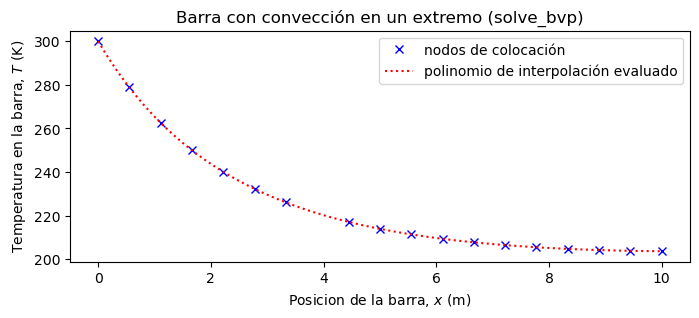

In [23]:
plt.rcParams.update({'font.size': 10}) # Tamaño de fuente
fig, ax = plt.subplots(figsize=(8,3))

x = np.linspace(0,L,100) # arreglo para gráficar 
T = out.sol(x)[0]        # valores de temperatura evaluados en polinomio de interpolación

ax.plot(xi,Ti,'xb', label = 'nodos de colocación')
ax.plot(x,T,':r',label = 'polinomio de interpolación evaluado')

ax.set_title('Barra con convección en un extremo (solve_bvp)')
ax.set_xlabel('Posicion de la barra, $x$ (m)')
ax.set_ylabel('Temperatura en la barra, $T$ (K)')
plt.legend()
plt.show()

## Errores numéricos y  estabilidad

Los problemas con condiciones de borde también estan expuestos a errores por truncamiento y por estabilidad.

-  En el caso del **método del disparo**, el error es similar a lo discutido con los métodos para resolver EDOs con valor inicial. Es decir, **este método puede presentar problemas de inestabilidad, rigidez, y errores de truncamiento** dependiendo del método utilizado para resolver el problema de valor inicial

- En el caso del **método de diferencias finitas**, el **error está directamente asociado al truncamiento de la serie de Taylor**, lo cual depende del esquema utilizado para la discretización (diferencia central, diferencia hacia adelante, etc).

- Similarmente, **el error del método método de colocación está condicionado al truncamiento de la serie de Taylor, el cual está intrínsecamente ligado al grado del polinomio de interpolación.**

Por último es importante mencionar que el método de diferencias finitas es fácilmente extendible a problemas expresados en ecuaciones diferenciales parciales. Esto lo revisaremos en la próxima unidad del curso.

## Referencias
- Kong Q., Siauw T., Bayen A. M. **Chapter 23: Boundary-Value Problems for ODEs** in *[Python Programming and Numerical Methods – A Guide for Engineers and Scientists](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter23.00-ODE-Boundary-Value-Problems.html)*, 1st Ed., Academic Press, 2021

- Chapra S., Canale R. **Capítulo 27 Problemas de valores en la frontera y de valores própios** en *Métodos Numéricos para Ingenieros*, 6ta Ed., McGraw Hill, 2011
